### Multiple linear regression

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data/economic_index.csv")
data.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
data.drop(["Unnamed: 0", "year", "month"], axis=1, inplace = True)

In [5]:
data.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
data.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [6]:
## Deciding independent and dependent variables
X = data[["interest_rate", "unemployment_rate"]]
Y = data["index_price"]

Text(0, 0.5, 'Unemployment rate')

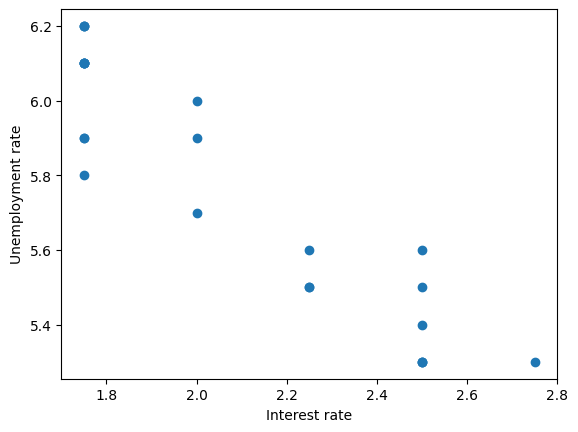

In [10]:
plt.scatter(data["interest_rate"], data['unemployment_rate'])
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")

In [44]:
## splitting into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

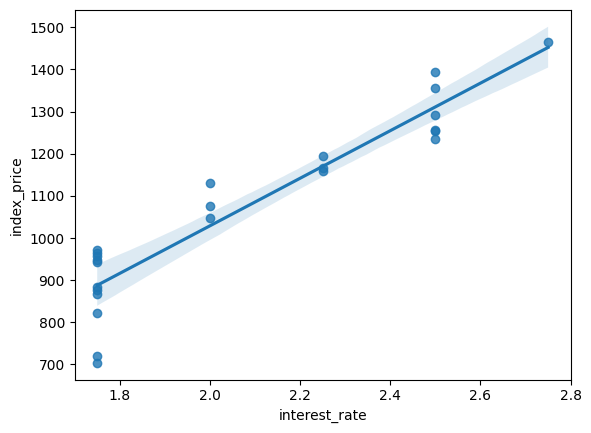

In [13]:
import seaborn as sns
sns.regplot(data=data, x = 'interest_rate',y = 'index_price')

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

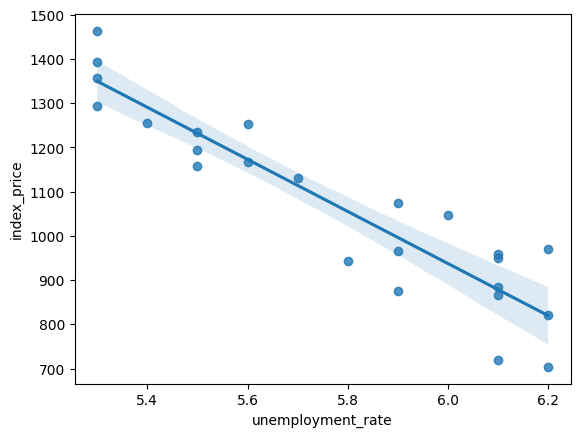

In [14]:
sns.regplot(data=data, x = 'unemployment_rate',y = 'index_price')

In [47]:
## Scaling the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(data[["interest_rate","unemployment_rate"]])
# data["unemployment_rate"] = scaler.fit_transform(data[["unemployment_rate"]])

array([[ 1.97880334, -1.47026414],
       [ 1.24816826, -1.47026414],
       [ 1.24816826, -1.47026414],
       [ 1.24816826, -1.47026414],
       [ 1.24816826, -1.16073485],
       [ 1.24816826, -0.54167626],
       [ 1.24816826, -0.85120556],
       [ 0.51753318, -0.85120556],
       [ 0.51753318, -0.85120556],
       [ 0.51753318, -0.54167626],
       [-0.2131019 , -0.23214697],
       [-0.2131019 ,  0.38691162],
       [-0.2131019 ,  0.69644091],
       [-0.94373698,  0.38691162],
       [-0.94373698,  0.07738232],
       [-0.94373698,  1.0059702 ],
       [-0.94373698,  1.3154995 ],
       [-0.94373698,  1.0059702 ],
       [-0.94373698,  1.0059702 ],
       [-0.94373698,  1.0059702 ],
       [-0.94373698,  0.38691162],
       [-0.94373698,  1.3154995 ],
       [-0.94373698,  1.3154995 ],
       [-0.94373698,  1.0059702 ]])

In [49]:
data['interest_rate']

0     1.978803
1     1.248168
2     1.248168
3     1.248168
4     1.248168
5     1.248168
6     1.248168
7     0.517533
8     0.517533
9     0.517533
10   -0.213102
11   -0.213102
12   -0.213102
13   -0.943737
14   -0.943737
15   -0.943737
16   -0.943737
17   -0.943737
18   -0.943737
19   -0.943737
20   -0.943737
21   -0.943737
22   -0.943737
23   -0.943737
Name: interest_rate, dtype: float64

In [50]:
data["unemployment_rate"]

0    -1.470264
1    -1.470264
2    -1.470264
3    -1.470264
4    -1.160735
5    -0.541676
6    -0.851206
7    -0.851206
8    -0.851206
9    -0.541676
10   -0.232147
11    0.386912
12    0.696441
13    0.386912
14    0.077382
15    1.005970
16    1.315499
17    1.005970
18    1.005970
19    1.005970
20    0.386912
21    1.315499
22    1.315499
23    1.005970
Name: unemployment_rate, dtype: float64

##### Building the model

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
X_test

,interest_rate,unemployment_rate
8,2.25,5.5
16,1.75,6.2
0,2.75,5.3
18,1.75,6.1
11,2.00,5.9
9,2.25,5.6
13,1.75,5.9
1,2.50,5.3


In [53]:
pred = regressor.predict(X_test)
pred

array([1192.13083729,  824.23971817, 1400.41971162,  856.16016713,
        992.22505325, 1160.21038833,  920.00106505, 1328.19572341])

In [54]:
print("Coefficients: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

Coefficients:  [ 288.89595281 -319.2044896 ]
Intercept:  2297.7396362444733


##### Predicting on new data

In [56]:
regressor.predict(scaler.transform([[2.25,5.9]]))

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1064.44904146])

##### Deteremining if the coefficients and intercepts are correct by double checking from OLS Method

In [57]:
import statsmodels.api as sm
model = sm.OLS(Y_train, X_train).fit()
model.summary()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1288.
Date:                Sun, 01 Feb 2026   Prob (F-statistic):                    1.35e-16
Time:                        13:34:06   Log-Likelihood:                         -92.365
No. Observations:                  16   AIC:                                      188.7
Df Residuals:                      14   BIC:                                      190.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
interest_rate       562.3309     47.495     11.840      0.000     460.464     664.198
unemployment_rate   -19.6544     16.957     -1.159      0.266     -56.023      16.714
==============================================================================
Omnibus:                        1.148   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                0.901
Skew:                          -0.527   Prob(JB):                        0.637
Kurtosis:                       2.508   Cond. No.                         14.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'predictions')

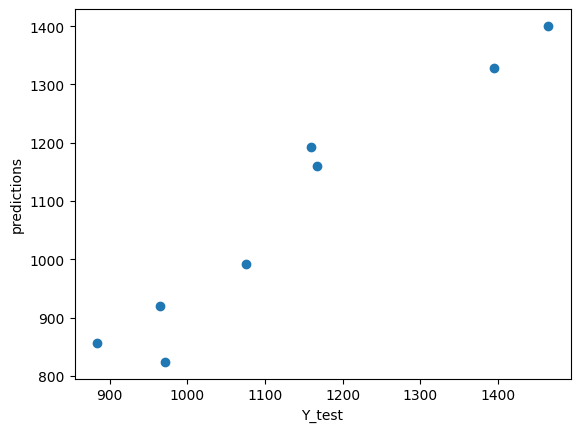

In [59]:
plt.scatter(Y_test, pred)
plt.xlabel("Y_test")
plt.ylabel("predictions")

In [61]:
residuals = pred-Y_test
residuals

8      33.130837
16   -146.760282
0     -63.580288
18    -27.839833
11    -82.774947
9      -6.789612
13    -44.998935
1     -65.804277
Name: index_price, dtype: float64

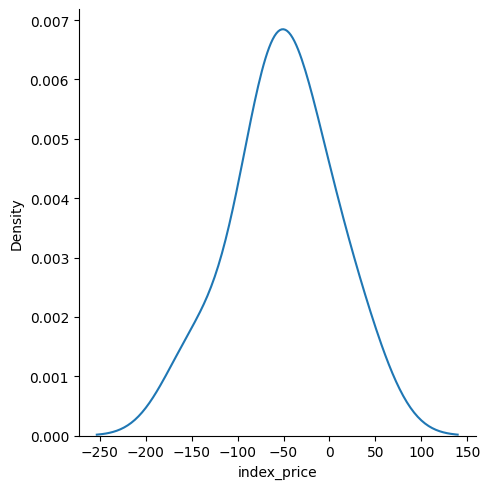

In [64]:
sns.displot(residuals, kind = "kde")

As the residuals form a normal distribution curve it means that the model is accurately fitted